<a href="https://colab.research.google.com/github/seerammouli/DataScience_MachineLearning/blob/main/sentimental_and_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import pandas_datareader as pdr

In [ ]:
df= pdr.get_data_yahoo("TTM")

In [ ]:
df.to_csv('TTM.csv')

In [ ]:
df=pd.read_csv("TTM.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-10-23,29.930000,29.280001,29.469999,29.700001,1825500.0,29.687599
1,2015-10-26,29.840000,29.340000,29.629999,29.480000,1104400.0,29.467690
2,2015-10-27,29.350000,28.959999,29.260000,29.139999,1403100.0,29.127831
3,2015-10-28,29.730000,29.190001,29.320000,29.620001,1590500.0,29.607632
4,2015-10-29,29.790001,29.430000,29.650000,29.580000,1533800.0,29.567648


In [ ]:
df.shape

(1257, 7)

In [ ]:
df.describe

<bound method NDFrame.describe of             Date       High        Low  ...      Close     Volume  Adj Close
0     2015-10-23  29.930000  29.280001  ...  29.700001  1825500.0  29.687599
1     2015-10-26  29.840000  29.340000  ...  29.480000  1104400.0  29.467690
2     2015-10-27  29.350000  28.959999  ...  29.139999  1403100.0  29.127831
3     2015-10-28  29.730000  29.190001  ...  29.620001  1590500.0  29.607632
4     2015-10-29  29.790001  29.430000  ...  29.580000  1533800.0  29.567648
...          ...        ...        ...  ...        ...        ...        ...
1252  2020-10-14   9.070000   8.920000  ...   8.920000  1036100.0   8.920000
1253  2020-10-15   8.820000   8.570000  ...   8.810000  1779600.0   8.810000
1254  2020-10-16   8.890000   8.770000  ...   8.800000   814700.0   8.800000
1255  2020-10-19   8.870000   8.610000  ...   8.610000  1698400.0   8.610000
1256  2020-10-20   9.040000   8.810000  ...   8.920000  1090600.0   8.920000

[1257 rows x 7 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Open       1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Volume     1257 non-null   float64
 6   Adj Close  1257 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.9+ KB


Text(0, 0.5, 'Close')

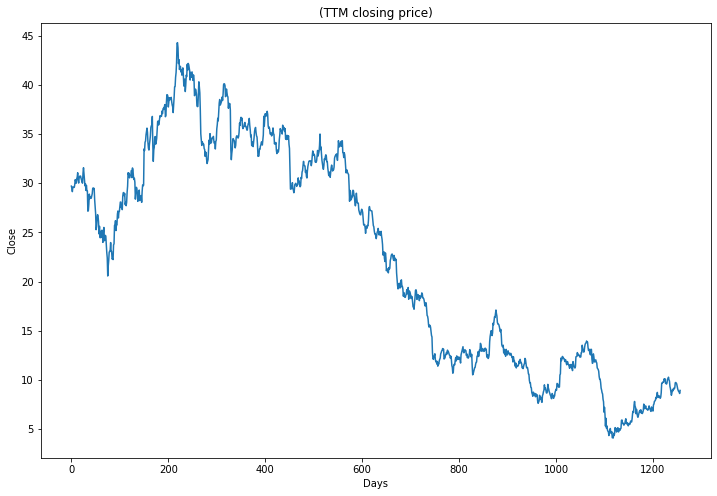

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.title('(TTM closing price)')
plt.xlabel('Days')
plt.ylabel('Close')

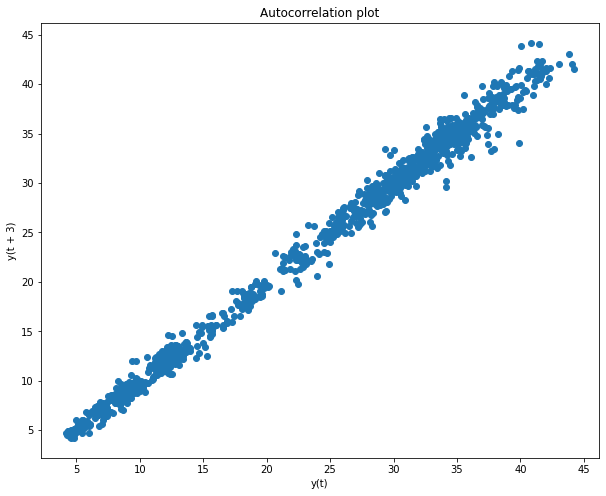

In [ ]:
plt.figure(figsize=(10,8))
lag_plot(df['Open'], lag=3)
plt.title('Autocorrelation plot')
plt.show()

<Figure size 432x288 with 0 Axes>

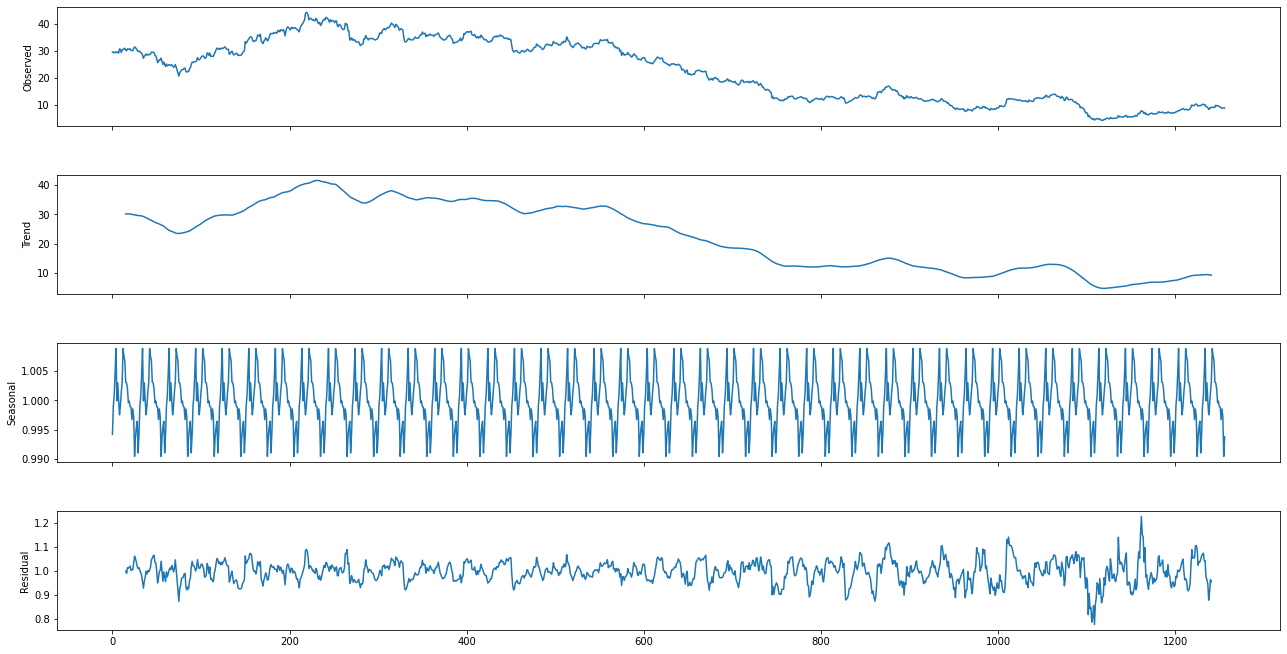

In [ ]:
sea_dec = seasonal_decompose(df['Open'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = sea_dec.plot() 
fig.set_size_inches(20, 10)

In [ ]:
train = df[df['Date'] < '2019-10-10']
test = df[df['Date'] >'2019-10-10']

In [ ]:
train.shape,test.shape

((997, 7), (259, 7))

In [ ]:
train.head

<bound method NDFrame.head of            Date       High        Low  ...      Close     Volume  Adj Close
0    2015-10-23  29.930000  29.280001  ...  29.700001  1825500.0  29.687599
1    2015-10-26  29.840000  29.340000  ...  29.480000  1104400.0  29.467690
2    2015-10-27  29.350000  28.959999  ...  29.139999  1403100.0  29.127831
3    2015-10-28  29.730000  29.190001  ...  29.620001  1590500.0  29.607632
4    2015-10-29  29.790001  29.430000  ...  29.580000  1533800.0  29.567648
..          ...        ...        ...  ...        ...        ...        ...
992  2019-10-03   8.710000   8.440000  ...   8.610000  2110900.0   8.610000
993  2019-10-04   8.480000   8.340000  ...   8.480000   902600.0   8.480000
994  2019-10-07   8.390000   8.210000  ...   8.290000  1365400.0   8.290000
995  2019-10-08   8.260000   8.100000  ...   8.120000  1232200.0   8.120000
996  2019-10-09   8.570000   8.380000  ...   8.400000  1886300.0   8.400000

[997 rows x 7 columns]>

In [ ]:
test_data = test['Close']
train_data = train['Close']

In [ ]:
test_data.shape, train_data.shape

((259,), (997,))

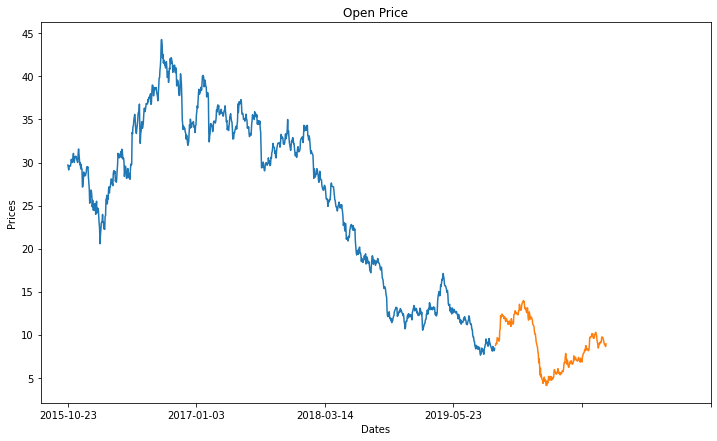

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Open Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data)
plt.plot(test_data)
plt.xticks(np.arange(0,1799, 300), df['Date'][0:1184:300])
plt.show()

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 53.1MB/s 
     |████████████████████████████████| 808kB 50.6MB/s 
     |████████████████████████████████| 8.7MB 39.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima

In [ ]:
autoARIMA_model = auto_arima(train_data, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, m=1 , seasonal=False, 
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(autoARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1680.033, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1672.279, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1672.890, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1679.477, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1673.596, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1673.911, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1675.312, Time=1.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1671.462, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1672.719, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1673.055, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1672.110, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1674.442, Time=0.20 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.642 seconds
                               SARIMAX Results                                
Dep. Vari

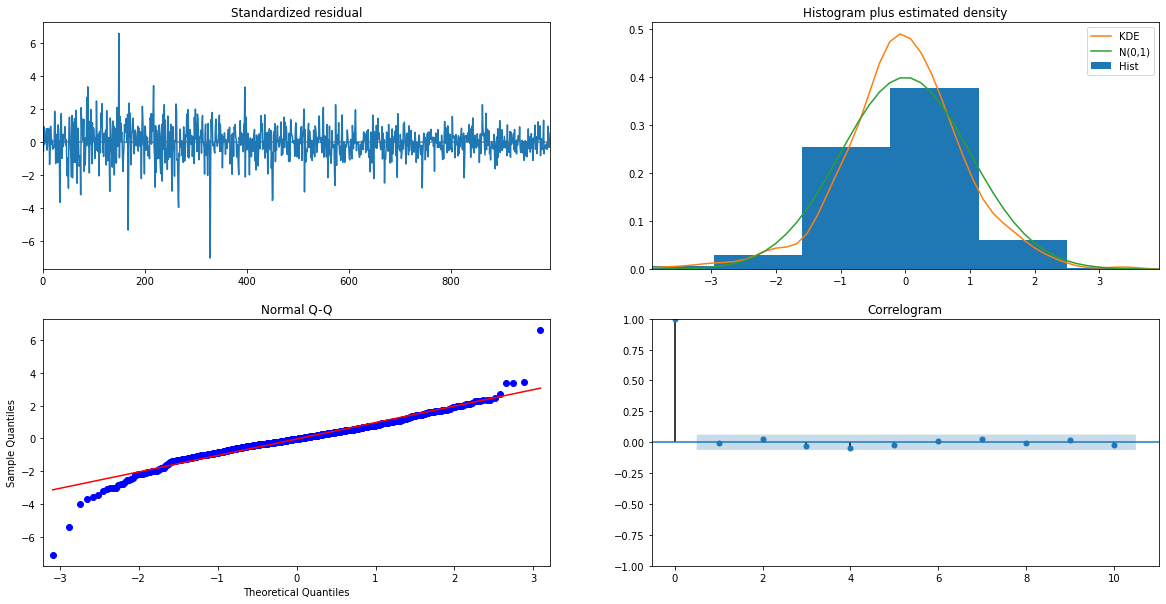

In [ ]:
autoARIMA_model.plot_diagnostics(figsize=(20,10))
plt.show()

In [ ]:
autoARIMA_model.fit(train_data)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

Fitting my model


In [ ]:
forecast = autoARIMA_model.predict(n_periods=259)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2095: RuntimeWarning: invalid value encountered in multiply
  endog = np.empty((nforecast, self.k_endog)) * np.nan


In [ ]:
forecast_data=pd.DataFrame(forecast,index=test_data.index,columns=['Prediction'])

To check accuracy

In [ ]:
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)

print('Mean Squared Error      : ',mse)
print('Root Mean_Squared_Error : ',rmse)
print('Mean Absolute Error     : ',mae)

Mean Squared Error      :  7.672231849432403
Root Mean_Squared_Error :  2.769879392578746
Mean Absolute Error     :  2.3863782099543758


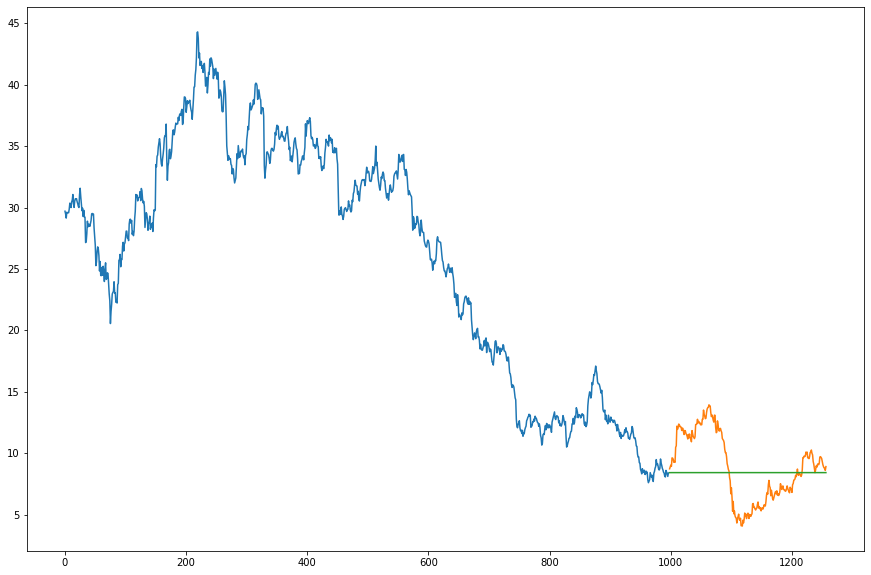

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_data['Prediction'])
plt.show()


**Sentimental Analysis on News data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
d=pd.read_csv('/content/drive/My Drive/india-news-headlines.csv')

In [ ]:
d

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [ ]:
d['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
actresses                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [ ]:
city_data = d[d['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [ ]:
city_data

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


Creating a temporary data set

In [ ]:
city_split = pd.DataFrame(columns=['city_name'])

Splitting city names and them to a temporary data set


In [ ]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

conacatination

In [ ]:
city_data = pd.concat([city_data,city_split],axis=1)

In [ ]:
city_data

,publish_date,headline_category,headline_text,city_name
274,20010104,city.bengaluru,Three in race for chief secy's post,bengaluru
275,20010104,city.patna,Druggists' stir leads to shortage of medicines,patna
278,20010104,city.bengaluru,He's not so inscrutable,bengaluru
279,20010104,city.delhi,DPCC stages Nyay rally,delhi
643,20010110,city.patna,Fend for yourselves; Pande tells doctors,patna
...,...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC,delhi
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge,bengaluru
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan,bengaluru
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...,kanpur


In [ ]:
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [ ]:
city_data.reset_index(inplace=True)

In [ ]:
city_data

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna
...,...,...,...,...
1842283,3297139,20200630,Remove illegal signage or face penalty: NDMC,delhi
1842284,3297158,20200630,what bengaluru can do to tackle covid surge,bengaluru
1842285,3297161,20200630,karnataka may adopt keralas triple lockdown plan,bengaluru
1842286,3297162,20200630,vehicle of up stf team bringing gangster vikas...,kanpur


In [ ]:
city_data.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

Grouping by headlines

In [ ]:
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [ ]:
city_headline

,headline_text
city_name,
agartala,1177
agra,4043
ahmedabad,85813
ajmer,1319
allahabad,18767
...,...
udaipur,1087
vadodara,20794
varanasi,15772


In [ ]:
city_headline = city_headline.sort_values(by='headline_text',ascending=False)

In [ ]:
city_headline

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
...,...
itanagar,709
gaya,461
kohima,432


In [ ]:
top_15_headline_city = city_headline.head(15)

In [ ]:
top_15_headline_city

<BarContainer object of 15 artists>

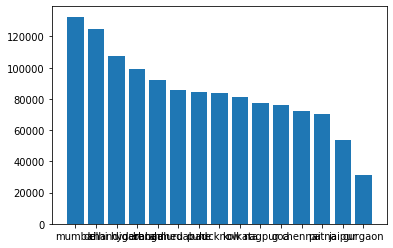

In [ ]:
plt.bar(top_15_headline_city.index,height=top_15_headline_city['headline_text'])

Text(0.5, 1.0, 'Bar plot based on cities of top 15')

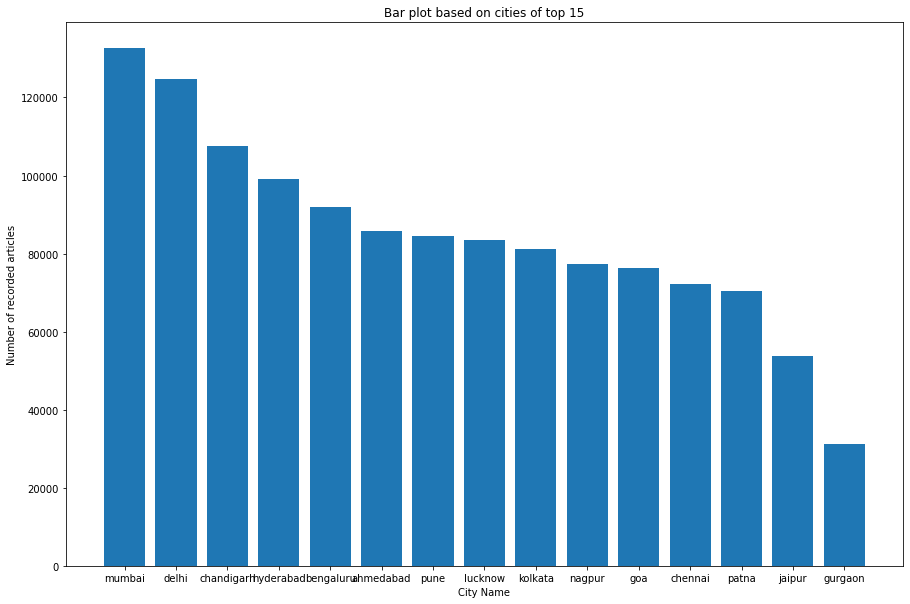

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['headline_text'])
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Bar plot based on cities of top 15')

In [ ]:
city_lesscount = city_headline.sort_values(by='headline_text',ascending=True)

In [ ]:
city_lesscount

In [ ]:
tail_10_headline_city = city_lesscount.head(10)
tail_10_headline_city

,headline_text
city_name,
rajahmundry,116
jind,291
kohima,432
gaya,461
itanagar,709
faridabad,724
shillong,1020
jamshedpur,1065
udaipur,1087


Text(0.5, 1.0, 'Articles per city')

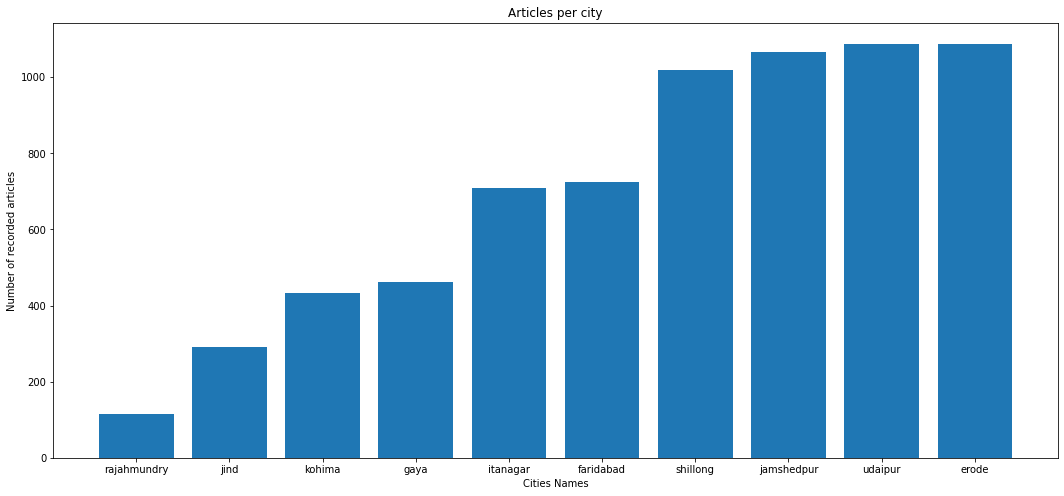

In [ ]:
plt.figure(figsize=(18,8))
plt.bar(tail_10_headline_city.index,height=tail_10_headline_city['headline_text'])
plt.xlabel('Cities Names')
plt.ylabel('Number of recorded articles')
plt.title('Articles per city')

Observed that ***Rajahmundry*** & ***Jind*** having less article per day and
***Mumbai*** & ***Delhi*** having high articles per day..

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 3.4MB/s 


In [ ]:
from vaderSentiment .vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_object = SentimentIntensityAnalyzer()

In [ ]:
sentiment_dict = sid_object.polarity_scores(d['headline_category'])

In [ ]:
print("Overall sentiment dic is : ", sentiment_dict)
print("sentimented rated as ", sentiment_dict["neg"]*100,"% Negative")
print("sentiment rated as", sentiment_dict["neu"]*100,"% Neutral")
print("senrtiment rated as ", sentiment_dict["pos"]*100," % Positive")

if sentiment_dict['compound'] < 0:
   print("Negative")
elif sentiment_dict['compound']== 0:
   print("Neutral")
else :
   print("Positive")


In [ ]:
import numpy as np

In [ ]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
d['Result'] = np.array([getAnalysis_polarity(headline) for headline in d['headline_text']])

In [68]:
d.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


In [69]:
final_result = d.groupby(['Result']).agg({'headline_text':'count'})

In [70]:
final_result

,headline_text
Result,
negative,398194
neutral,2301599
positive,597379


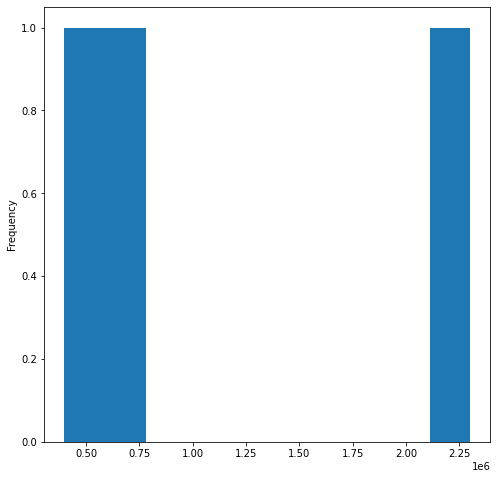

In [74]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.hist(d)
plt.show()

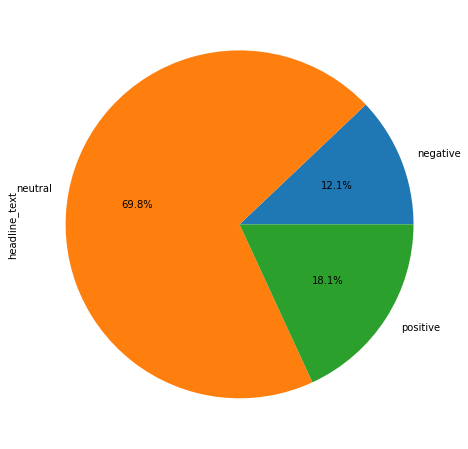

In [75]:
plt.figure(figsize=(10,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.show()

In [77]:
negative = (final_result.loc['negative'] / len(d))*100
neutral = (final_result.loc['neutral'] / len(d))*100
positive = (final_result.loc['positive'] / len(d))*100

In [78]:
print('Positive : ' , positive )
print('\n\nNegative : ' ,negative )
print('\n\nUnbiased : ' , str(neutral))

Positive :  headline_text    18.11792
Name: positive, dtype: float64


Negative :  headline_text    12.076834
Name: negative, dtype: float64


Unbiased :  headline_text    69.805245
Name: neutral, dtype: float64


######################## ***HYBRID MODEL***###########################

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
csv1=pd.read_csv('/content/drive/My Drive/india-news-headlines.csv')

In [10]:
csv1.head

<bound method NDFrame.head of          publish_date  ...                                      headline_text
0            20010101  ...  win over cena satisfying but defeating underta...
1            20010102  ...  Status quo will not be disturbed at Ayodhya; s...
2            20010102  ...                Fissures in Hurriyat over Pak visit
3            20010102  ...              America's unwanted heading for India?
4            20010102  ...                 For bigwigs; it is destination Goa
...               ...  ...                                                ...
3297167      20200630  ...      why tiktok removed 1 65 crore videos in india
3297168      20200630  ...  apurva asrani calls alia bhatts mother soni ra...
3297169      20200630  ...  kangana ranaut gets a doll version of herself ...
3297170      20200630  ...  meezaan jaffrey reminisces his childhood days ...
3297171      20200630  ...  prabhas20 titled as radhe shyam prabhas and po...

[3297172 rows x 3 columns]>

In [11]:
csv1.rename(columns={'publish_date':'Date'},inplace=True)

In [12]:
csv1.head

<bound method NDFrame.head of              Date  ...                                      headline_text
0        20010101  ...  win over cena satisfying but defeating underta...
1        20010102  ...  Status quo will not be disturbed at Ayodhya; s...
2        20010102  ...                Fissures in Hurriyat over Pak visit
3        20010102  ...              America's unwanted heading for India?
4        20010102  ...                 For bigwigs; it is destination Goa
...           ...  ...                                                ...
3297167  20200630  ...      why tiktok removed 1 65 crore videos in india
3297168  20200630  ...  apurva asrani calls alia bhatts mother soni ra...
3297169  20200630  ...  kangana ranaut gets a doll version of herself ...
3297170  20200630  ...  meezaan jaffrey reminisces his childhood days ...
3297171  20200630  ...  prabhas20 titled as radhe shyam prabhas and po...

[3297172 rows x 3 columns]>

In [17]:
csv1['Date']=pd.to_datetime(csv1.Date,format='%Y%m%d')

In [29]:
csv1.dtypes

Date                 datetime64[ns]
headline_category            object
headline_text                object
dtype: object

In [32]:
csv1.head

<bound method NDFrame.head of               Date  ...                                      headline_text
0       2001-01-01  ...  win over cena satisfying but defeating underta...
1       2001-01-02  ...  Status quo will not be disturbed at Ayodhya; s...
2       2001-01-02  ...                Fissures in Hurriyat over Pak visit
3       2001-01-02  ...              America's unwanted heading for India?
4       2001-01-02  ...                 For bigwigs; it is destination Goa
...            ...  ...                                                ...
3297167 2020-06-30  ...      why tiktok removed 1 65 crore videos in india
3297168 2020-06-30  ...  apurva asrani calls alia bhatts mother soni ra...
3297169 2020-06-30  ...  kangana ranaut gets a doll version of herself ...
3297170 2020-06-30  ...  meezaan jaffrey reminisces his childhood days ...
3297171 2020-06-30  ...  prabhas20 titled as radhe shyam prabhas and po...

[3297172 rows x 3 columns]>

In [4]:
import pandas as pd
csv2=pd.read_csv('/content/drive/My Drive/TTM.csv')

In [38]:
csv2['Date'] = pd.to_datetime(csv2.Date, format='%Y-%m-%d')

In [39]:
csv2.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [41]:
new_data = csv1.merge(csv2,on='Date', left_index=True)

In [43]:
new_data.head()

,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume
0,2019-10-21,india,Haryana; Maharashtra assembly polls: Your guid...,9.6,9.63,9.46,9.51,9.51,1055700
0,2019-10-21,entertainment.hindi.bollywood,from kalki koechlin to amy jackson and kareena...,9.6,9.63,9.46,9.51,9.51,1055700
0,2019-10-21,life-style.beauty,Bollywood-inspired hairstyles to try this Diwali,9.6,9.63,9.46,9.51,9.51,1055700
0,2019-10-21,life-style.health-fitness.weight-loss,Weight loss story: 'I lost 14 kilos because I ...,9.6,9.63,9.46,9.51,9.51,1055700
0,2019-10-21,entertainment.events.nashik,Cycle wari on the occasion of Navratra held in...,9.6,9.63,9.46,9.51,9.51,1055700


In [47]:
from textblob import TextBlob

In [48]:
def analysis_polarity(headline):
  
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [49]:
import numpy as np
new_data['sentiment'] = np.array([analysis_polarity(headline) for headline in new_data['headline_text']])

In [50]:
new_data.head()

,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-10-21,india,Haryana; Maharashtra assembly polls: Your guid...,9.6,9.63,9.46,9.51,9.51,1055700,neutral
0,2019-10-21,entertainment.hindi.bollywood,from kalki koechlin to amy jackson and kareena...,9.6,9.63,9.46,9.51,9.51,1055700,neutral
0,2019-10-21,life-style.beauty,Bollywood-inspired hairstyles to try this Diwali,9.6,9.63,9.46,9.51,9.51,1055700,neutral
0,2019-10-21,life-style.health-fitness.weight-loss,Weight loss story: 'I lost 14 kilos because I ...,9.6,9.63,9.46,9.51,9.51,1055700,neutral
0,2019-10-21,entertainment.events.nashik,Cycle wari on the occasion of Navratra held in...,9.6,9.63,9.46,9.51,9.51,1055700,neutral


In [71]:
new_data.dtypes

Date                 datetime64[ns]
headline_category            object
headline_text                object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Adj Close                   float64
Volume                        int64
sentiment                    object
dtype: object

In [75]:
from statistics import mean

In [84]:
from statistics import mode

In [76]:
from fractions import Fraction as fr

In [87]:
print("Mean of new_data (Close) is % s" % (mean(new_data['Close'])))

Mean of new_data (Close) is 8.960199285730639


In [88]:
print("Mean of new_data (sentiment) is % s" % (mode(new_data['sentiment'])))

Mean of new_data (sentiment) is neutral


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier

In [66]:
from sklearn.model_selection import train_test_split

In [94]:
X = new_data.iloc[:, :-7].values
y = new_data.iloc[:, -7].values

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [69]:
classifier = rf(max_depth=2, random_state=0)

In [92]:
classifier.fit(X,y)

TypeError: ignored